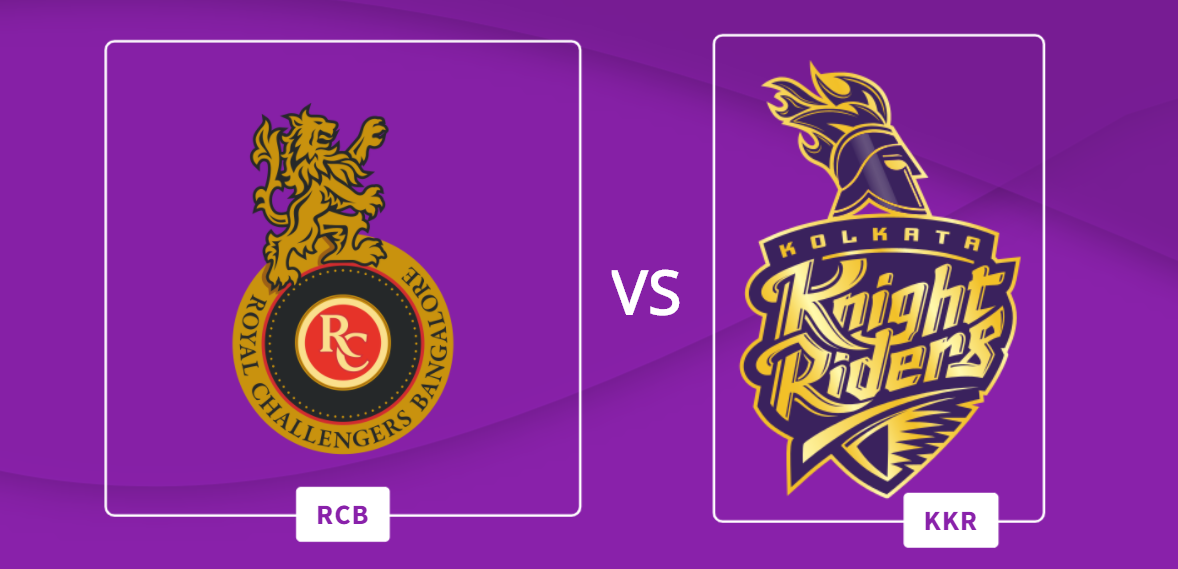

# Analysis for RCB Vs KKR
## RCB VS KKR Squad

### RCB: Virat Kohli, AB de Villiers, Gurkeerat Mann, Devdutt Padikkal, Aaron Finch, Yuzvendra Chahal, Mohammed Siraj, Umesh Yadav, Navdeep Saini, Adam Zampa, Dale Steyn, Isuru Udana, Moeen Ali, Pawan Negi, Shivam Dube, Washington Sundar, Chris Morris, Pavan Deshpande, Parthiv Patel, Joshua Philippe, Shahbaz Ahmad.

### KKR :  Andre Russell, Dinesh Karthik, Kamlesh Nagarkoti, Kuldeep Yadav, Ali Khan, Lockie Ferguson, Nitish Rana, Prasidh Krishna, Rinku Singh, Sandeep Warrier, Shivam Mavi, Shubman Gill, Siddhesh Lad, Sunil Narine, Pat Cummins, Eoin Morgan, Varun Chakravarthy, Tom Banton, Rahul Tripathi, Chris Green, M Siddharth, Nikhil Naik

### Match Venue : Sharjah Cricket Stadium

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data

In [180]:
matches = pd.read_csv("matches.csv")

## Analysis of Dataset with EDA and some Visualizations

In [181]:
matches.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [182]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

### Checking  unique values

In [183]:
matches.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [184]:
matches.team2.unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [185]:
matches.venue.unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [186]:
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

### Data cleaning

In [187]:
matches.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
matches.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
matches.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
matches.team1.replace({'Delhi Daredevils' : 'Delhi Capitals'},regex=True,inplace=True)
matches.team2.replace({'Delhi Daredevils' : 'Delhi Capitals'},regex=True,inplace=True)
matches.winner.replace({'Delhi Daredevils' : 'Delhi Capitals'},regex=True,inplace=True)
matches.venue.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                    'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                     'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium'},regex=True,inplace=True)

###############################################################################################################################

# Part 1 : Who will win the match?

###############################################################################################################################

#### Let's analyze the data first for all the teams

## One-On-One performance matrix

In [93]:
teams_2020=['Chennai Super Kings','Mumbai Indians','Rajasthan Royals','Delhi Capitals','Sunrisers Hyderabad','Kolkata Knight Riders','Royal Challengers Bangalore','Kings XI Punjab']

In [392]:
team_1 = matches[matches.team1.isin(teams_2020)]
team_2 = team_1[team_1.team2.isin(teams_2020)]
teams_ = team_2[team_2.winner.isin(teams_2020)]


In [144]:
face_off_ =teams_.groupby(['team1','team2','winner']).apply(lambda x:x['winner'].count()).reset_index(name='win_count')
face_off_['Game'] = face_off_['team1']+' vs. '+face_off_['team2']

In [145]:
heatmap_face_off = pd.pivot_table(face_off_, values='win_count', index=['Game'], columns='winner')


Text(21.453124999999986, 0.5, 'Game')

<Figure size 432x288 with 0 Axes>

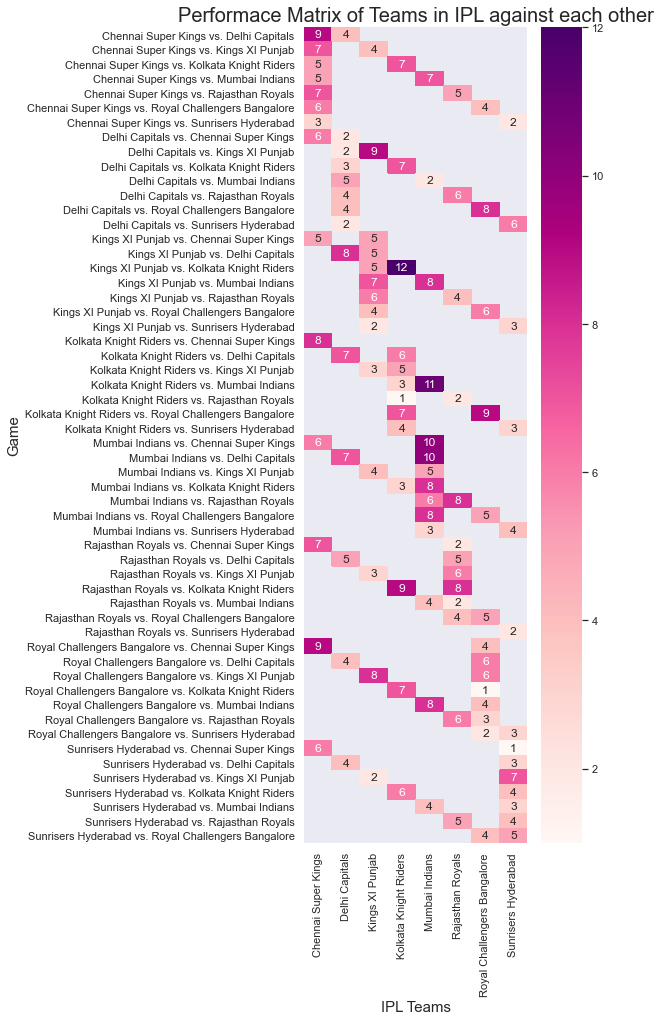

In [146]:
fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(5,15))

g = sns.heatmap(heatmap_face_off, annot=True, cmap="RdPu", fmt='g')
ax.set_title('Performace Matrix of Teams in IPL against each other',size=20)
ax.set_xlabel('IPL Teams',size=15)
ax.set_ylabel('Game',size=15)

In [188]:
win_count = pd.DataFrame(matches['winner'].value_counts())
win_count['Team_name']=win_count.index
win_count

,winner,Team_name
Mumbai Indians,109,Mumbai Indians
Chennai Super Kings,100,Chennai Super Kings
Kolkata Knight Riders,92,Kolkata Knight Riders
Royal Challengers Bangalore,84,Royal Challengers Bangalore
Kings XI Punjab,82,Kings XI Punjab
Delhi Capitals,77,Delhi Capitals
Rajasthan Royals,75,Rajasthan Royals
Sunrisers Hyderabad,58,Sunrisers Hyderabad
Deccan Chargers,29,Deccan Chargers
Rising Pune Supergiant,15,Rising Pune Supergiant


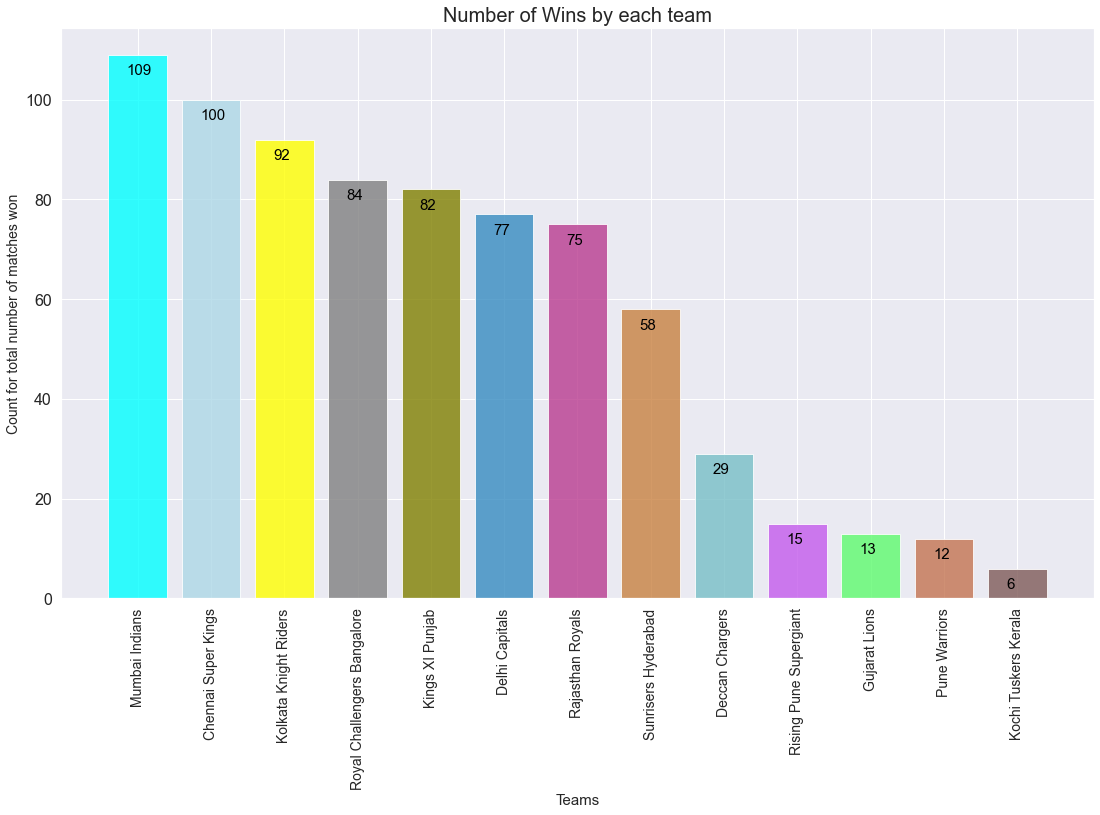

In [189]:
color_code = ['cyan', 'LightBlue', 'Yellow', 'Grey', 'Olive', '#368BC1', '#B93B8F', '#C88141', '#77BFC7', '#C45AEC', '#5EFB6E',
             '#C47451', '#7F5A58','#F6358A','#842DCE']
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)

plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=16)
plt.bar(win_count['Team_name'], win_count['winner'], color=color_code, alpha=0.8)


for count, i in enumerate(win_count['winner'],0):
    plt.text(count-0.15,i-4,str(i),size=15,color='black')
    
plt.title('Number of Wins by each team',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Count for total number of matches won',fontsize=14)
plt.show()


## From above plot we can see the Total Matches won by KKR and RCB
### Kolkata Knight Riders =  92
### Royal Challengers Bangalore = 84

## Calculate Winning percentage of both KKR and RCB

In [215]:
RCB_data = matches[(matches.team1=='Royal Challengers Bangalore') | (matches.team2 =='Royal Challengers Bangalore')] 
KKR_data = matches[(matches.team1 =='Kolkata Knight Riders') | (matches.team2 =='Kolkata Knight Riders')] 

## RCB's performance against other teams in IPL


In [219]:
teams_20=['Chennai Super Kings','Mumbai Indians','Rajasthan Royals','Delhi Capitals','Sunrisers Hyderabad','Kolkata Knight Riders','Royal Challengers Bangalore','Kings XI Punjab']

RCB_team_1 = RCB_data[RCB_data.team1.isin(teams_20)]
RCB_team_2 = RCB_team_1[RCB_team_1.team2.isin(teams_20)]
RCB_teams_ = RCB_team_2[RCB_team_2.winner.isin(teams_20)]


Text(21.453124999999986, 0.5, 'Game')

<Figure size 432x288 with 0 Axes>

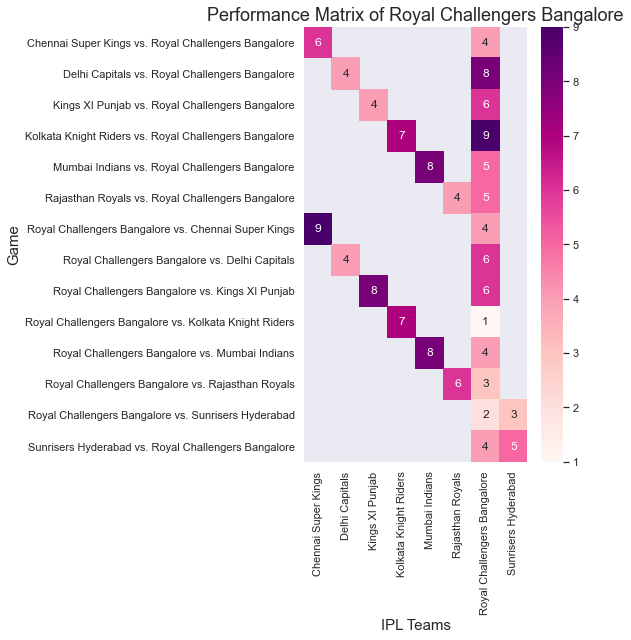

In [242]:
RCB_face_off_ = RCB_teams_.groupby(['team1','team2','winner']).apply(lambda x:x['winner'].count()).reset_index(name='win_count')
RCB_face_off_['Game'] = RCB_face_off_['team1']+' vs. '+RCB_face_off_['team2']

RCB_heatmap_face_off = pd.pivot_table(RCB_face_off_, values='win_count', index=['Game'], columns='winner')


fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(5,8))

g = sns.heatmap(RCB_heatmap_face_off, annot=True, cmap="RdPu", fmt='g')
ax.set_title('Performance Matrix of Royal Challengers Bangalore',size=18)
ax.set_xlabel('IPL Teams',size=15)
ax.set_ylabel('Game',size=15)

In [243]:
RCB_w_p = (84 /RCB_data.shape[0])*100
print("Winning percentage of RCB in IPL(2008-2019):",RCB_w_p)

Winning percentage of RCB in IPL(2008-2019): 46.666666666666664


## KKR's performance against other teams in IPL

Text(21.453124999999986, 0.5, 'Game')

<Figure size 432x288 with 0 Axes>

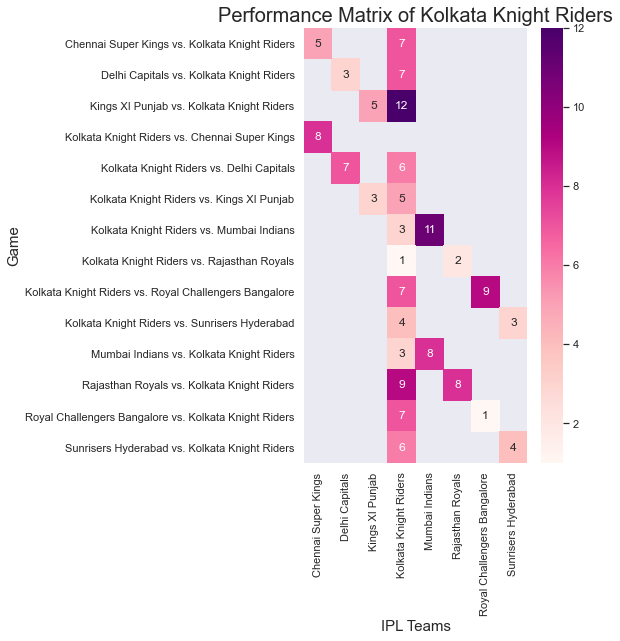

In [244]:
KKR_team_1 = KKR_data[KKR_data.team1.isin(teams_20)]
KKR_team_2 = KKR_team_1[KKR_team_1.team2.isin(teams_20)]
KKR_teams_ = KKR_team_2[KKR_team_2.winner.isin(teams_20)]

KKR_face_off_ = KKR_teams_.groupby(['team1','team2','winner']).apply(lambda x:x['winner'].count()).reset_index(name='win_count')
KKR_face_off_['Game'] = KKR_face_off_['team1']+' vs. '+KKR_face_off_['team2']

KKR_heatmap_face_off = pd.pivot_table(KKR_face_off_, values='win_count', index=['Game'], columns='winner')


fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(5,8))

g = sns.heatmap(KKR_heatmap_face_off, annot=True, cmap="RdPu", fmt='g')
ax.set_title('Performance Matrix of Kolkata Knight Riders',size=20)
ax.set_xlabel('IPL Teams',size=15)
ax.set_ylabel('Game',size=15)

In [245]:
KKR_w_p = (84 /KKR_data.shape[0])*100
print("Winning percentage of RCB in IPL(2008-2019):",KKR_w_p)

Winning percentage of RCB in IPL(2008-2019): 47.19101123595505


## KKR Vs RCB performance in past 

In [246]:
KKR_RCB = matches[np.logical_or(np.logical_and(matches['team1']=='Royal Challengers Bangalore',matches['team2']=='Kolkata Knight Riders'),np.logical_and(matches['team2']=='Royal Challengers Bangalore',matches['team1']=='Kolkata Knight Riders'))]

Text(21.453124999999986, 0.5, 'Game')

<Figure size 432x288 with 0 Axes>

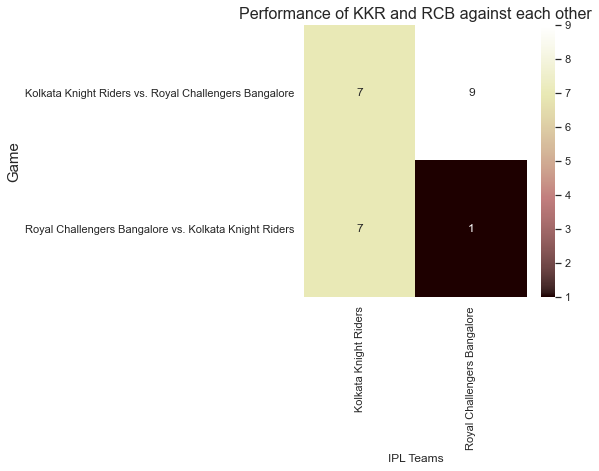

In [247]:
KR_team_1 = KKR_RCB[KKR_RCB.team1.isin(teams_20)]
KR_team_2 = KR_team_1[KR_team_1.team2.isin(teams_20)]
KR_teams_ = KR_team_2[KR_team_2.winner.isin(teams_20)]

KR_face_off_ = KR_teams_.groupby(['team1','team2','winner']).apply(lambda x:x['winner'].count()).reset_index(name='win_count')
KR_face_off_['Game'] = KR_face_off_['team1']+' vs. '+KR_face_off_['team2']

KR_heatmap_face_off = pd.pivot_table(KR_face_off_, values='win_count', index=['Game'], columns='winner')


fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(5,5))

g = sns.heatmap(KR_heatmap_face_off, annot=True, cmap="pink", fmt='g')
ax.set_title('Performance of KKR and RCB against each other',size=16)
ax.set_xlabel('IPL Teams',size=12)
ax.set_ylabel('Game',size=15)

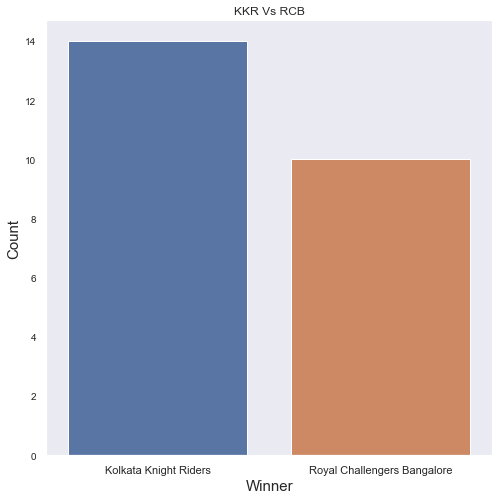

In [254]:
sns.set(style='dark')
fig=plt.gcf()
fig.set_size_inches(8,8)

sns.countplot(x="winner",data=KKR_RCB)
plt.xlabel('Winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.yticks(fontsize=10)
plt.title('KKR Vs RCB')
plt.show()

## Above plot shows number of matches won by KKR and RCB against Each other
### Kolkata Knight Riders won : 14 matches
### Royal Challengers Bangalore won : 10 matches

### Winning Percentage of KKR and RCB when playing against each other

In [ ]:
KKR_w_p_ = (14/KKR_RCB.shape[0])*100
print("Winning percentage of KKR against RCB :",KKR_w_p_)

In [259]:
RCB_w_p_ = (10/KKR_RCB.shape[0])*100
print("Winning percentage of RCB against KKR :",RCB_w_p_)

Winning percentage of RCB against KKR : 41.66666666666667


## Let's Check Venue wise winner


### Venue wise winners (All Teams)

In [260]:
# Teamwise winning performances at diffrent Venues
win_v = matches.groupby(['venue','winner']).apply(lambda x:x['winner'].count()).reset_index(name='win_count')
win_v.head()

,venue,winner,win_count
0,ACA-VDCA Stadium,Chennai Super Kings,1
1,ACA-VDCA Stadium,Delhi Capitals,1
2,Barabati Stadium,Deccan Chargers,3
3,Barabati Stadium,Kings XI Punjab,1
4,Barabati Stadium,Kolkata Knight Riders,3


Text(0.5, 1.0, 'Wins at the Venues')

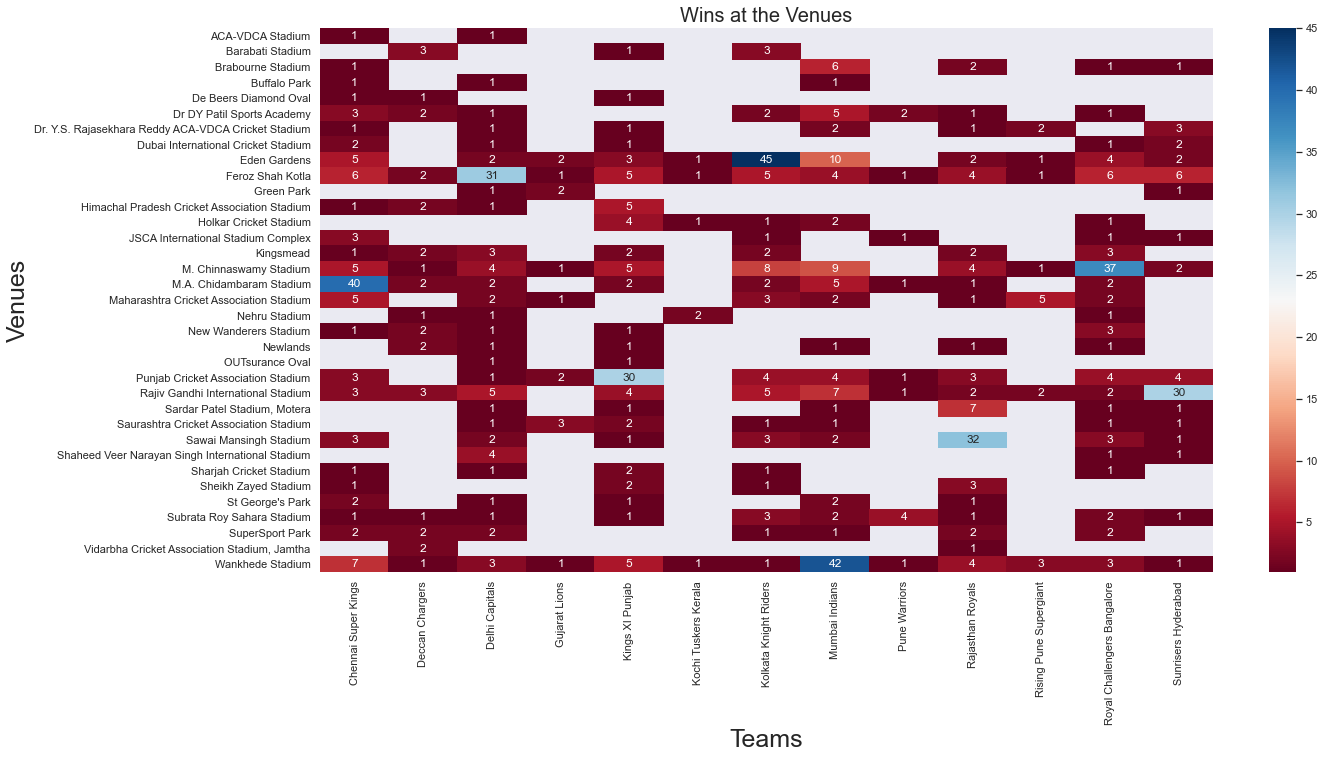

In [261]:
# transform the dataset
win_v_ = pd.pivot(win_v,values='win_count',index='venue',columns='winner')
win_v_.replace(np.NaN,0)

plt.figure(figsize=(20,10))

htmp=sns.heatmap(win_v_,annot=True,fmt='g',cmap='RdBu')

plt.xlabel('Teams',size=25)
plt.ylabel('Venues',size=25)
plt.title('Wins at the Venues',size=20)

### Venue for KKR Vs RCB is : Sharjah Cricket Stadium

In [267]:
matches_SCS = matches[matches.venue == "Sharjah Cricket Stadium"]
# Teamwise winning performances at Sharjah Cricket Stadium
win_v_SCS = matches_SCS.groupby(['venue','winner']).apply(lambda x:x['winner'].count()).reset_index(name='win_count')
win_v_SCS.head()

,venue,winner,win_count
0,Sharjah Cricket Stadium,Chennai Super Kings,1
1,Sharjah Cricket Stadium,Delhi Capitals,1
2,Sharjah Cricket Stadium,Kings XI Punjab,2
3,Sharjah Cricket Stadium,Kolkata Knight Riders,1
4,Sharjah Cricket Stadium,Royal Challengers Bangalore,1


Text(0.5, 1.0, 'Wins at the Sharjah Cricket Stadium')

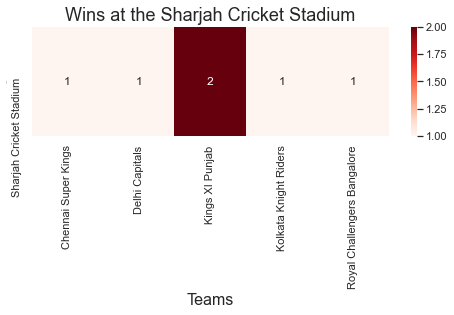

In [276]:
# transform the dataset
win_v_SCS_ = pd.pivot(win_v_SCS,values='win_count',index='venue',columns='winner')
win_v_SCS_.replace(np.NaN,0)

plt.figure(figsize=(8,2))

htmp=sns.heatmap(win_v_SCS_, annot=True, fmt='g',cmap='Reds')

plt.xlabel('Teams',size=16)
plt.ylabel('Venues',size=0)
plt.title('Wins at the Sharjah Cricket Stadium',size=18)

In [263]:
KKR_RCB[KKR_RCB.venue == "Sharjah Cricket Stadium"]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
467,468,2014,Sharjah,2014-04-24,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,2,0,CA Lynn,Sharjah Cricket Stadium,Aleem Dar,VA Kulkarni,NaN


## No effect of venue

## TODO: Conclusion +Regression 

In [278]:
# Regression


###############################################################################################################################

# Part 2

###############################################################################################################################

## Impact of Toss decision on Winning

In [316]:
batting_first = matches[matches.toss_decision == "bat"]


In [285]:
#batting_first['winner'].value_counts()
batting_first_win = pd.DataFrame(batting_first['winner'].value_counts())
batting_first_win['Team_name'] = batting_first_win.index
batting_first_win

,winner,Team_name
Chennai Super Kings,52,Chennai Super Kings
Mumbai Indians,45,Mumbai Indians
Kolkata Knight Riders,35,Kolkata Knight Riders
Rajasthan Royals,34,Rajasthan Royals
Delhi Capitals,31,Delhi Capitals
Royal Challengers Bangalore,26,Royal Challengers Bangalore
Kings XI Punjab,21,Kings XI Punjab
Sunrisers Hyderabad,21,Sunrisers Hyderabad
Deccan Chargers,14,Deccan Chargers
Pune Warriors,9,Pune Warriors


In [295]:
fielding_first = matches[matches.toss_decision == "field"]
#Fielding_first['winner'].value_counts()
fielding_first_win = pd.DataFrame(fielding_first['winner'].value_counts())
fielding_first_win['Team_name'] = fielding_first_win.index
fielding_first_win

,winner,Team_name
Mumbai Indians,64,Mumbai Indians
Kings XI Punjab,61,Kings XI Punjab
Royal Challengers Bangalore,58,Royal Challengers Bangalore
Kolkata Knight Riders,57,Kolkata Knight Riders
Chennai Super Kings,48,Chennai Super Kings
Delhi Capitals,46,Delhi Capitals
Rajasthan Royals,41,Rajasthan Royals
Sunrisers Hyderabad,37,Sunrisers Hyderabad
Deccan Chargers,15,Deccan Chargers
Rising Pune Supergiant,13,Rising Pune Supergiant


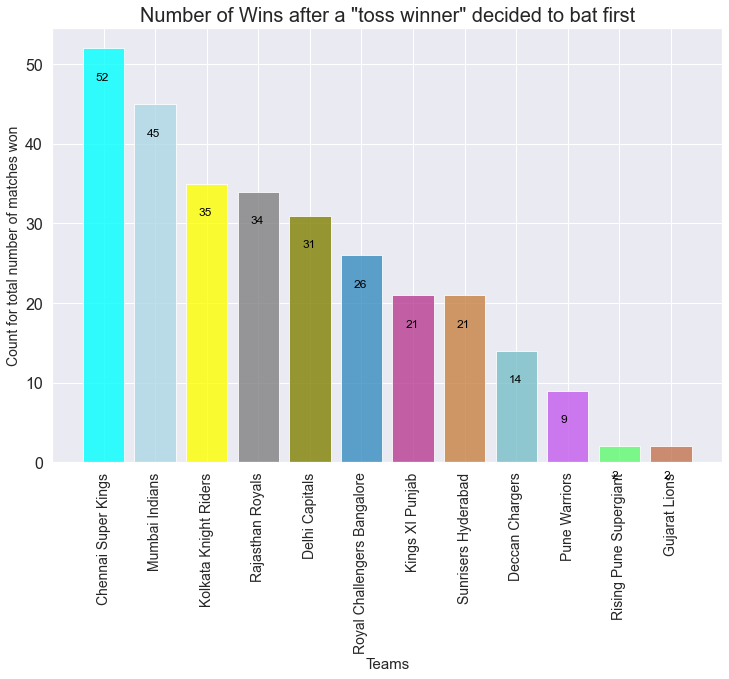

In [317]:
color_code_ = ['cyan', 'LightBlue', 'Yellow', 'Grey', 'Olive', '#368BC1', '#B93B8F', '#C88141', '#77BFC7', '#C45AEC', '#5EFB6E',
             '#C47451', '#7F5A58','#F6358A','#842DCE']
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(12,8)

plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=16)
plt.bar(batting_first_win['Team_name'], batting_first_win['winner'], color=color_code_, alpha=0.8)


for count, i in enumerate(batting_first_win['winner'],0):
    plt.text(count-0.15,i-4,str(i),size=12,color='black')
    
plt.title('Number of Wins after a "toss winner" decided to bat first',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Count for total number of matches won',fontsize=14)
plt.show()

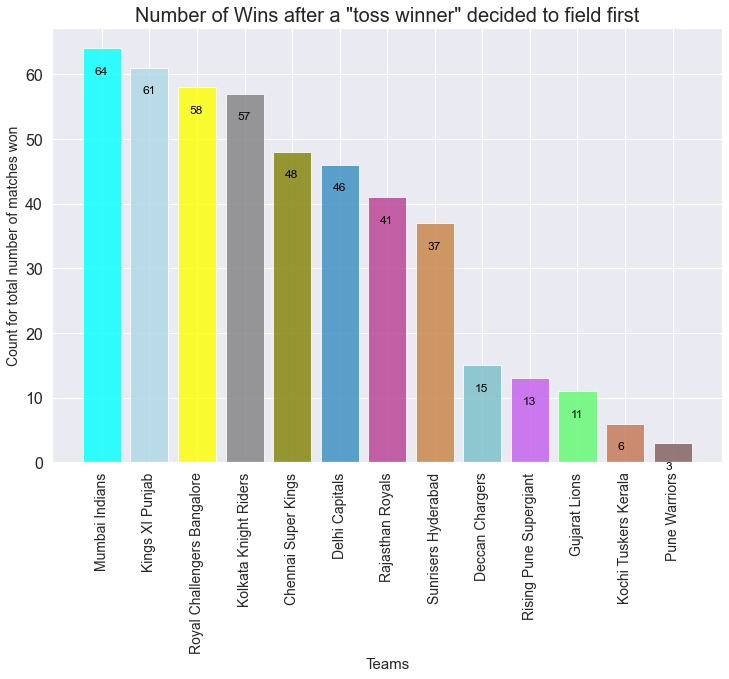

In [318]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(12,8)

plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=16)
plt.bar(fielding_first_win['Team_name'],fielding_first_win['winner'], color=color_code_, alpha=0.8)


for count, i in enumerate(fielding_first_win['winner'],0):
    plt.text(count-0.15,i-4,str(i),size=12,color='black')
    
plt.title('Number of Wins after a "toss winner" decided to field first',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Count for total number of matches won',fontsize=14)
plt.show()

## Winning Chances for KKR and RCB after a "toss winner" decided to bat/field first
#### No. of wins by RCB when a toss decision (by toss winner) was to bat first = 26 <br>No. of wins by KKR when a toss decision (by toss winner) was  to bat first = 35
#### No. of wins by RCB when a toss decision (by toss winner) was to field first = 58<br>No. of wins by KKR when a toss decision (by toss winner) was to field first = 57

## Winning percentage when Toss winner were either KKR or RCB based on their Toss decision to bat/field first 

In [332]:
KKR_toss = KKR_data[KKR_data.toss_winner == "Kolkata Knight Riders"]
KKR_toss_bat = KKR_data[(KKR_data.toss_winner == "Kolkata Knight Riders") & (KKR_data.toss_decision == "bat")]
KKR_toss_bat_win = KKR_data[(KKR_data.toss_winner == "Kolkata Knight Riders") & (KKR_data.toss_decision == "bat") & (KKR_data.winner == "Kolkata Knight Riders")]

KKR_toss_field = KKR_data[(KKR_data.toss_winner == "Kolkata Knight Riders") & (KKR_data.toss_decision == "field")]
KKR_toss_field_win = KKR_data[(KKR_data.toss_winner == "Kolkata Knight Riders") & (KKR_data.toss_decision == "field") & (KKR_data.winner == "Kolkata Knight Riders")]

KKR_toss_bat_win_p = (KKR_toss_bat_win.shape[0]/KKR_toss_bat.shape[0])*100
KKR_toss_field_win_p = (KKR_toss_field_win.shape[0]/KKR_toss_field.shape[0])*100

In [333]:
RCB_toss = RCB_data[RCB_data.toss_winner == "Royal Challengers Bangalore"]
RCB_toss_bat = RCB_data[(RCB_data.toss_winner == "Royal Challengers Bangalore") & (RCB_data.toss_decision == "bat")]
RCB_toss_bat_win = RCB_data[(RCB_data.toss_winner == "Royal Challengers Bangalore") & (RCB_data.toss_decision == "bat") & (RCB_data.winner == "Royal Challengers Bangalore")]

RCB_toss_field = RCB_data[(RCB_data.toss_winner == "Royal Challengers Bangalore") & (RCB_data.toss_decision == "field")]
RCB_toss_field_win = RCB_data[(RCB_data.toss_winner == "Royal Challengers Bangalore") & (RCB_data.toss_decision == "field") & (RCB_data.winner == "Royal Challengers Bangalore")]

RCB_toss_bat_win_p = (RCB_toss_bat_win.shape[0]/RCB_toss_bat.shape[0])*100
RCB_toss_field_win_p = (RCB_toss_field_win.shape[0]/RCB_toss_field.shape[0])*100

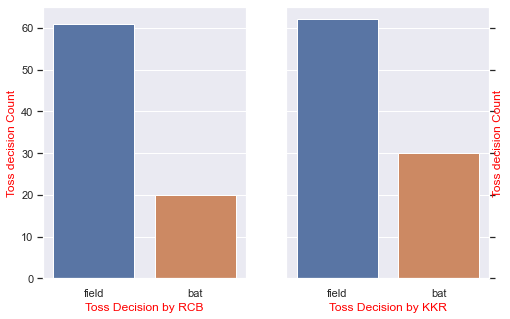

In [350]:
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,5),sharey=True)

sns.countplot(x="toss_decision",data=RCB_toss, ax = ax1)
ax1.set_ylabel('Toss decision Count', fontsize=12, color ='red')
ax1.set_xlabel('Toss Decision by RCB', fontsize=12, color ='red')
ax1.yaxis.tick_left()

sns.countplot(x="toss_decision",data=KKR_toss, ax = ax2)
ax2.set_ylabel('Toss decision Count', fontsize=12, color ='red')
ax2.set_xlabel('Toss Decision by KKR', fontsize=12, color ='red')
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()

plt.show()

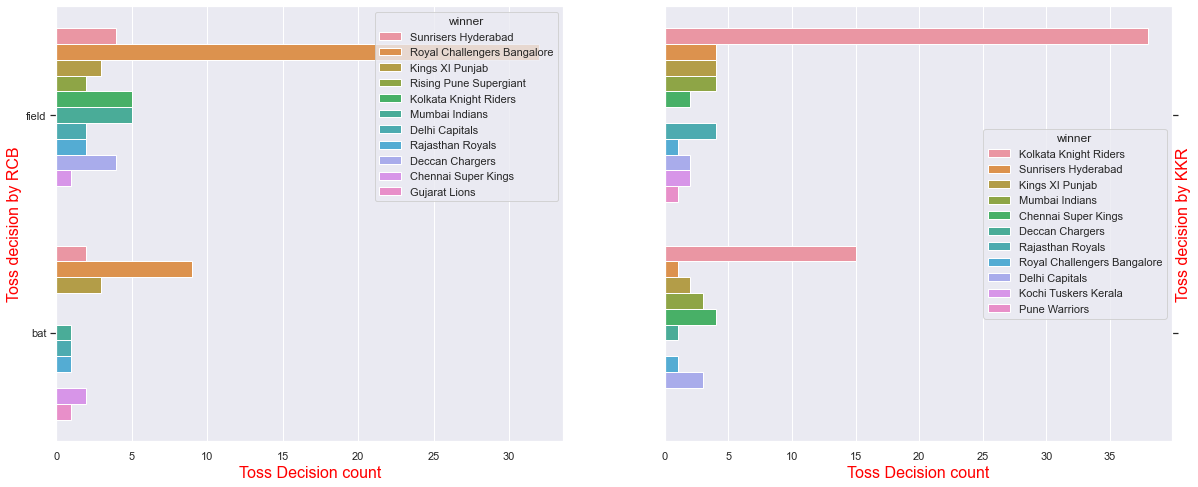

In [356]:
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,8),sharey=True)

sns.countplot(y="toss_decision", hue = "winner", data=RCB_toss, ax = ax1)
ax1.set_ylabel('Toss decision by RCB', fontsize=16, color ='red')
ax1.set_xlabel('Toss Decision count', fontsize=16, color ='red')
ax1.yaxis.tick_left()

sns.countplot(y="toss_decision",hue = "winner", data=KKR_toss, ax = ax2)
ax2.set_ylabel('Toss decision by KKR', fontsize=16, color ='red')
ax2.set_xlabel('Toss Decision count', fontsize=16, color ='red')
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()

plt.show()

In [330]:
print("Percentage of winning for KKR after deciding to bat first : ", KKR_toss_bat_win_p)
print("Percentage of winning for KKR after deciding to field first : ", KKR_toss_field_win_p)

print("\nPercentage of winning for RCB after deciding to bat first : ", RCB_toss_bat_win_p)
print("Percentage of winning for RCB after deciding to field first : ", RCB_toss_field_win_p)

Percentage of winning for KKR after deciding to bat first :  50.0
Percentage of winning for KKR after deciding to field first :  61.29032258064516

Percentage of winning for RCB after deciding to bat first :  45.0
Percentage of winning for RCB after deciding to field first :  52.459016393442624


## from the over all IPL matches played against other teams by RCB and KKR it looks like chances of winning for both the teams is deciding to field first after winning a toss.

## But, what about when KKR and RCB are playing against each other?

In [359]:
KKR_RCB_K = KKR_RCB[KKR_RCB.toss_winner == "Kolkata Knight Riders"]
KKR_RCB_R = KKR_RCB[KKR_RCB.toss_winner == "Royal Challengers Bangalore"]

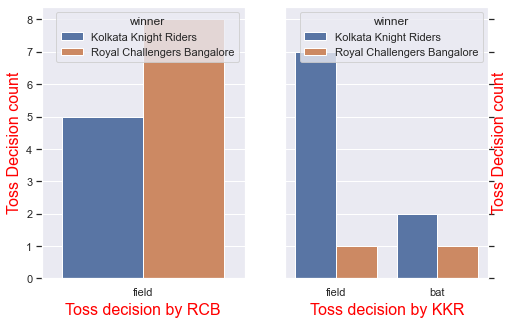

In [363]:
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,5),sharey=True)

sns.countplot(x="toss_decision", hue = "winner", data=KKR_RCB_R, ax = ax1)
ax1.set_xlabel('Toss decision by RCB', fontsize=16, color ='red')
ax1.set_ylabel('Toss Decision count', fontsize=16, color ='red')
ax1.yaxis.tick_left()

sns.countplot(x="toss_decision",hue = "winner", data=KKR_RCB_K, ax = ax2)
ax2.set_xlabel('Toss decision by KKR', fontsize=16, color ='red')
ax2.set_ylabel('Toss Decision count', fontsize=16, color ='red')
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()

plt.show()

## from above plot it looks like RCB always decided to field when playing against KKR has a higher winning chances with the decision. Same is the case with KKR deciding to field first has been proved the best decision for them too.

## Venue wise toss decision is also crucial so let's see the trends in toss decision Venue wise

## Overall Venues in IPL so far

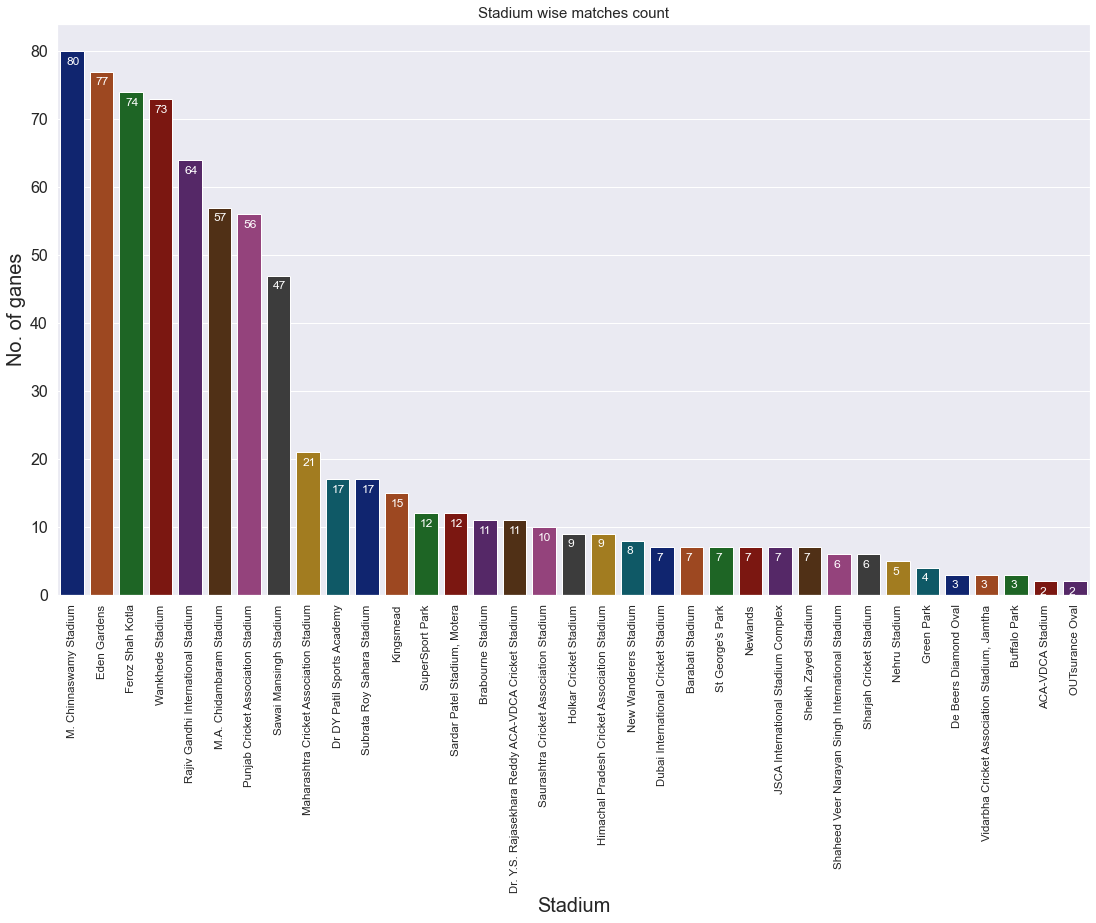

In [370]:
venue_data = pd.DataFrame(matches['venue'].value_counts())
venue_data['Venue_name'] = venue_data.index


fig=plt.gcf()
fig.set_size_inches(18.5,10.5)

sns.countplot(matches['venue'], order = matches['venue'].value_counts().index,palette='dark')

plt.xticks(rotation=90,fontsize=11.5)
plt.yticks(fontsize=16)
plt.xlabel('Stadium',fontsize=20)
plt.ylabel('No. of ganes',fontsize=20)
plt.title('Stadium wise matches count',fontsize=15)


for count, i in enumerate(venue_data['venue'],0):
    plt.text(count-0.2,i-2,str(i),color='white',size=12)
    
plt.show()

In [365]:
toss_v = teams_.groupby(['venue','toss_decision']).apply(lambda x:x['toss_decision'].count()).reset_index(name='toss_decision_count')
# Transform dataset
heatmap_toss_v = pd.pivot_table(toss_v, values='toss_decision_count', index=['venue'], columns='toss_decision')

Text(0.5, 1.0, 'Toss Decisions taken by Venue')

<Figure size 432x288 with 0 Axes>

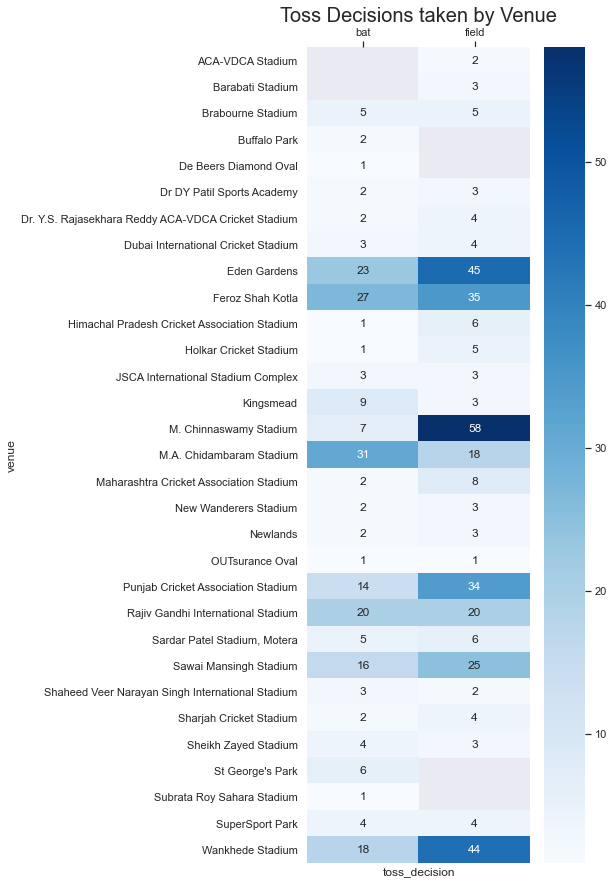

In [366]:
# Plot heatmap
fig = plt.figure()
fig, ax = plt.subplots(1, 1, figsize=(5,15))

g = sns.heatmap(heatmap_toss_v, annot=True, cmap="Blues", fmt='g')

g.xaxis.set_ticks_position("top")

ax.set_title('Toss Decisions taken by Venue',size=20)

### Impact of Toss Decision and Venue on Winning or Loosing a match 

In [371]:
impact_v_t = teams_.groupby(['venue','toss_decision']).apply(lambda x:np.sum(np.where(x['toss_winner']==x['winner'],1,0))).reset_index(name='toss_winner_is_match_winner')
# lets merge toss venue decision data (toss_v)
merged_v = pd.merge(impact_v_t, toss_v, how='inner', left_on=['venue','toss_decision'], right_on=['venue','toss_decision'])

# Calculate toss_winner_is_match_looser
merged_v['toss_winner_is_match_looser'] = merged_v['toss_decision_count']-merged_v['toss_winner_is_match_winner']

Text(48.453124999999986, 0.5, 'Stadium')

<Figure size 432x288 with 0 Axes>

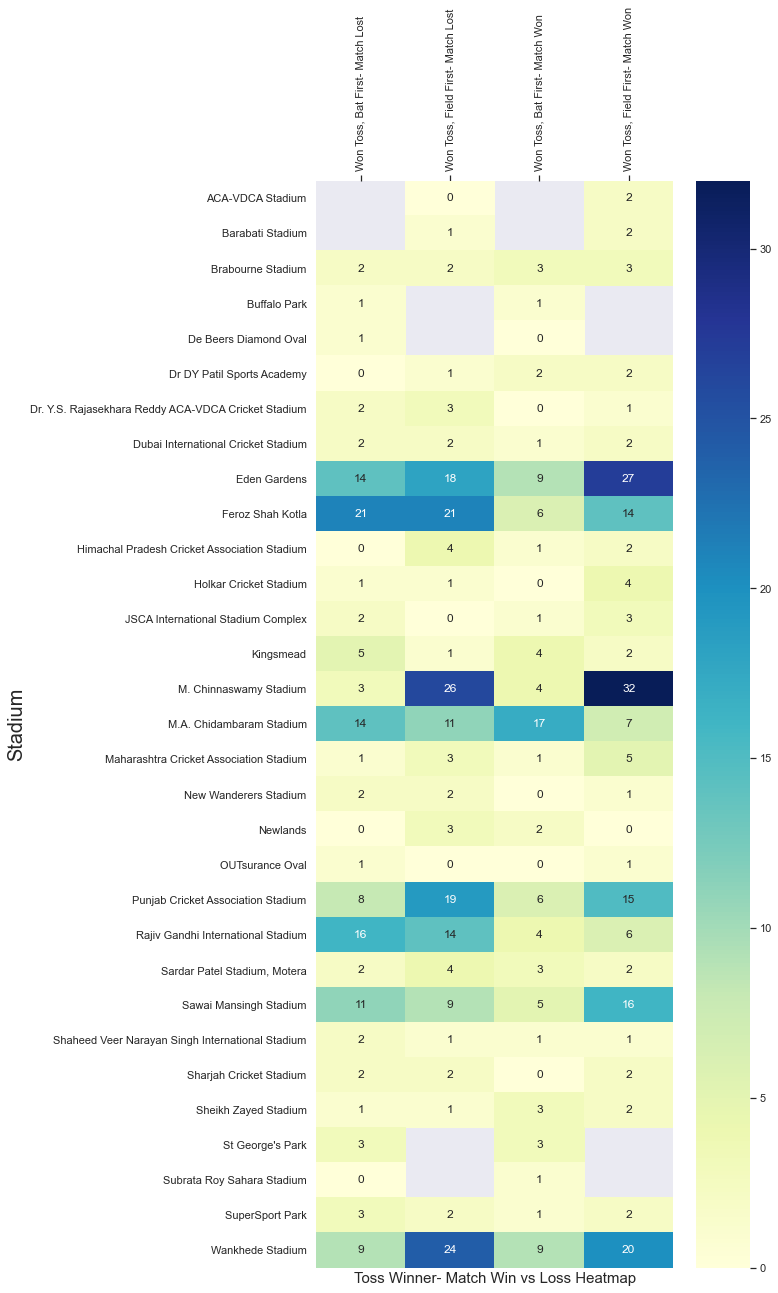

In [372]:
# Heatmap for above analysis
heatmap_impact_v_t = pd.pivot_table(merged_v, values=['toss_winner_is_match_winner','toss_winner_is_match_looser'], index=['venue'], 
                     columns='toss_decision')

fig=plt.figure()
fig,ax1=plt.subplots(1,1,figsize=(8,20))
g=sns.heatmap(heatmap_impact_v_t, annot=True, cmap='YlGnBu', fmt='g')

g.xaxis.set_ticks_position("top")
g.set_xticklabels(['Won Toss, Bat First- Match Lost','Won Toss, Field First- Match Lost','Won Toss, Bat First- Match Won','Won Toss, Field First- Match Won'],rotation=90)
g.set_xlabel('Toss Winner- Match Win vs Loss Heatmap',size=15)
g.set_ylabel('Stadium',size=20)

### Impact of Toss Decision and Venue on Winning or Loosing a match on RCB

In [395]:
toss_vr = RCB_toss.groupby(['venue','toss_decision']).apply(lambda x:x['toss_decision'].count()).reset_index(name='toss_decision_count')

In [397]:
# when RCB is a toss winner
impact_v_tr = RCB_toss.groupby(['venue','toss_decision']).apply(lambda x:np.sum(np.where(x['toss_winner']==x['winner'],1,0))).reset_index(name='toss_winner_is_match_winner')
# lets merge toss venue decision data (toss_v)
merged_vr = pd.merge(impact_v_tr, toss_vr, how='inner', left_on=['venue','toss_decision'], right_on=['venue','toss_decision'])

# Calculate toss_winner_is_match_looser
merged_vr['toss_winner_is_match_looser'] = merged_vr['toss_decision_count']-merged_vr['toss_winner_is_match_winner']

Text(21.453124999999986, 0.5, 'Stadium')

<Figure size 432x288 with 0 Axes>

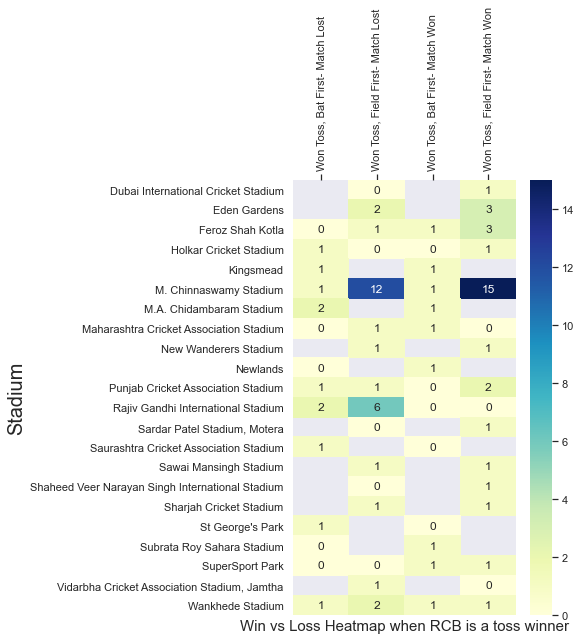

In [398]:
# Heatmap for above analysis
heatmap_impact_v_tr = pd.pivot_table(merged_vr, values=['toss_winner_is_match_winner','toss_winner_is_match_looser'], index=['venue'], 
                     columns='toss_decision')

fig=plt.figure()
fig,ax1=plt.subplots(1,1,figsize=(5,8))
g=sns.heatmap(heatmap_impact_v_tr, annot=True, cmap='YlGnBu', fmt='g')

g.xaxis.set_ticks_position("top")
g.set_xticklabels(['Won Toss, Bat First- Match Lost','Won Toss, Field First- Match Lost','Won Toss, Bat First- Match Won','Won Toss, Field First- Match Won'],rotation=90)
g.set_xlabel('Win vs Loss Heatmap when RCB is a toss winner',size=15)
g.set_ylabel('Stadium',size=20)

## Looking at the RCB history with Sharjah Cricket stadium RCB has a 50% chances of winning or loosing after deciding to field first.
## 2 matches have been played by RCB on Sharjah and both the times it decided to field first.
## Hence, There are strong chances of deciding to field first by RCB after winning a toss in this match too.

### Impact of Toss Decision and Venue on Winning or Loosing a match on KKR

In [409]:
toss_vk = KKR_toss.groupby(['venue','toss_decision']).apply(lambda x:x['toss_decision'].count()).reset_index(name='toss_decision_count')

In [410]:
# when KKR is a toss winner
impact_v_tk = KKR_toss.groupby(['venue','toss_decision']).apply(lambda x:np.sum(np.where(x['toss_winner']==x['winner'],1,0))).reset_index(name='toss_winner_is_match_winner')
# lets merge toss venue decision data (toss_v)
merged_vk = pd.merge(impact_v_tk, toss_vk, how='inner', left_on=['venue','toss_decision'], right_on=['venue','toss_decision'])

# Calculate toss_winner_is_match_looser
merged_vk['toss_winner_is_match_looser'] = merged_vk['toss_decision_count']-merged_vk['toss_winner_is_match_winner']

Text(21.453124999999982, 0.5, 'Stadium')

<Figure size 432x288 with 0 Axes>

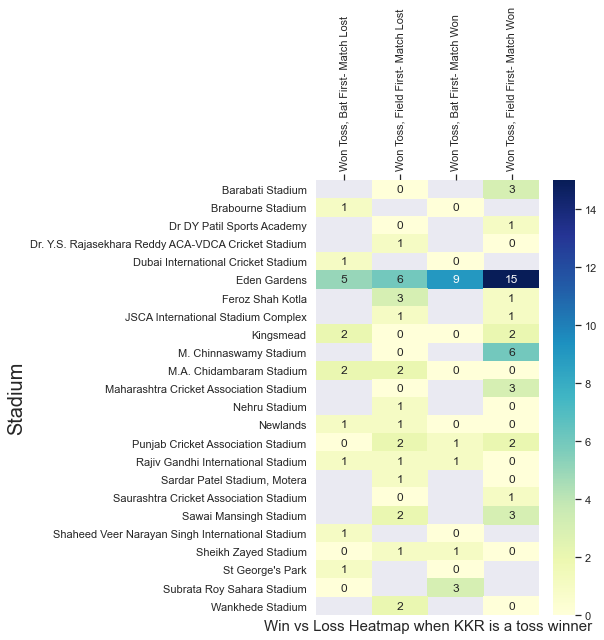

In [411]:
# Heatmap for above analysis
heatmap_impact_v_tk = pd.pivot_table(merged_vk, values=['toss_winner_is_match_winner','toss_winner_is_match_looser'], index=['venue'], 
                     columns='toss_decision')

fig=plt.figure()
fig,ax1=plt.subplots(1,1,figsize=(5,8))
g=sns.heatmap(heatmap_impact_v_tk, annot=True, cmap='YlGnBu', fmt='g')

g.xaxis.set_ticks_position("top")
g.set_xticklabels(['Won Toss, Bat First- Match Lost','Won Toss, Field First- Match Lost','Won Toss, Bat First- Match Won','Won Toss, Field First- Match Won'],rotation=90)
g.set_xlabel('Win vs Loss Heatmap when KKR is a toss winner',size=15)
g.set_ylabel('Stadium',size=20)

## KKR never won a toss at Sharjah 

### KKR Vs RCB venue and Toss decision

Text(21.45312499999999, 0.5, 'Stadium')

<Figure size 432x288 with 0 Axes>

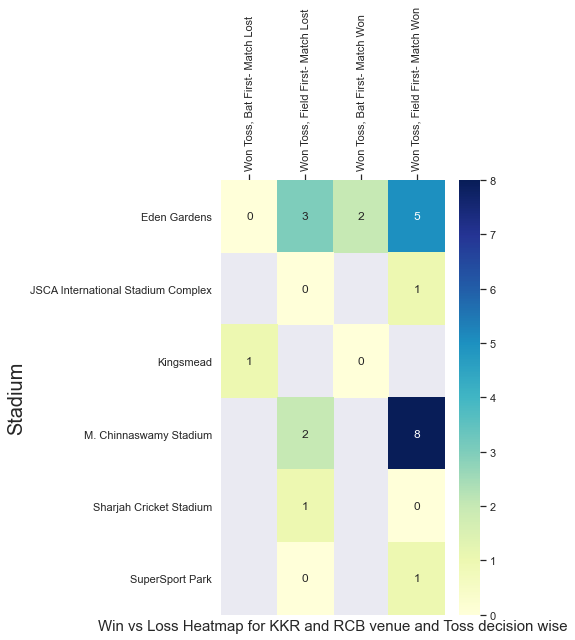

In [419]:
toss_vkr = KKR_RCB.groupby(['venue','toss_decision']).apply(lambda x:x['toss_decision'].count()).reset_index(name='toss_decision_count')

# when RCB is a toss winner
impact_v_tkr = KKR_RCB.groupby(['venue','toss_decision']).apply(lambda x:np.sum(np.where(x['toss_winner']==x['winner'],1,0))).reset_index(name='toss_winner_is_match_winner')
# lets merge toss venue decision data (toss_v)
merged_vkr = pd.merge(impact_v_tkr, toss_vkr, how='inner', left_on=['venue','toss_decision'], right_on=['venue','toss_decision'])

# Calculate toss_winner_is_match_looser
merged_vkr['toss_winner_is_match_looser'] = merged_vkr['toss_decision_count']-merged_vkr['toss_winner_is_match_winner']

# Heatmap for above analysis
heatmap_impact_v_tkr = pd.pivot_table(merged_vkr, values=['toss_winner_is_match_winner','toss_winner_is_match_looser'], index=['venue'], 
                     columns='toss_decision')

fig=plt.figure()
fig,ax1=plt.subplots(1,1,figsize=(5,8))
g=sns.heatmap(heatmap_impact_v_tkr, annot=True, cmap='YlGnBu', fmt='g')

g.xaxis.set_ticks_position("top")
g.set_xticklabels(['Won Toss, Bat First- Match Lost','Won Toss, Field First- Match Lost','Won Toss, Bat First- Match Won','Won Toss, Field First- Match Won'],rotation=90)
g.set_xlabel('Win vs Loss Heatmap for KKR and RCB venue and Toss decision wise',size=15)
g.set_ylabel('Stadium',size=20)

## There is one match played between KKR and RCB on Sharjah where RCB decided to field but lost.
### But, a single match can not be a deciding factor

## From all above analysis RCB or KKR whoever is a toss winner would decide to Field first as both teams has shown better winning chances in the past with this decision

###############################################################################################################################

# Part 3: KD Karthik score analysis

###############################################################################################################################

In [154]:
players = pd.read_csv("deliveries.csv")

## Dataset Analysis

## Top 10 Batsman

In [420]:
batting_ = players.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
batting_sorted = batting_.sort_values(by='Runs',ascending=False)

top_batsmen = batting_sorted[:10] 
print('Top 10 Batsmen:\n',top_batsmen)



Top 10 Batsmen:
             batsman  Runs
486         V Kohli  5434
428        SK Raina  5415
367       RG Sharma  4914
112       DA Warner  4741
392        S Dhawan  4632
92         CH Gayle  4560
290        MS Dhoni  4477
384      RV Uthappa  4446
26   AB de Villiers  4428
147       G Gambhir  4223


In [421]:
# Visualizations with plotly
import plotly.express as px
import plotly.graph_objects as go
fig = px.bar(top_batsmen, x='batsman', y='Runs',hover_data=['batsman'], color='Runs',title='Top 10 Batsmen (IPL : 2008-2019)')
fig.show()

## Top 10 Bowlers

In [422]:
# Remove Rin-out as it does not count as Wicket on bowler's account
bowling_w= players[players['dismissal_kind']!='run out']

bowling_ = bowling_w.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')

bowling_w_count = bowling_.groupby('bowler').count().reset_index()

bowling_top = bowling_w_count.sort_values(by='Wickets',ascending=False)

top_bowlers = bowling_top.loc[:,['bowler','Wickets']][0:10] 

print('Top Bowlers according to Wickets taken:\n',top_bowlers)


Top Bowlers according to Wickets taken:
               bowler  Wickets
290       SL Malinga      170
6           A Mishra      156
110  Harbhajan Singh      150
227        PP Chawla      149
82          DJ Bravo      147
46           B Kumar      133
232         R Ashwin      125
296        SP Narine      122
326         UT Yadav      119
244        RA Jadeja      108


In [423]:
fig = px.bar(top_bowlers, x='bowler', y='Wickets', hover_data=['bowler'], color='Wickets',title='Top 10 Bowlers (IPL- S2008-2019)')
fig.show()

In [439]:
batsman_kd = players[players.batsman == "KD Karthik"]

In [440]:
batsman_kd.sum(axis = 0, skipna = True)

match_id                                                   5577126
inning                                                        4185
batting_team     Gujarat LionsGujarat LionsGujarat LionsGujarat...
bowling_team     Kolkata Knight RidersKolkata Knight RidersKolk...
over                                                         33825
ball                                                         10440
batsman          KD KarthikKD KarthikKD KarthikKD KarthikKD Kar...
non_striker      SK RainaSK RainaSK RainaSK RainaSK RainaSK Rai...
bowler           Kuldeep YadavKuldeep YadavTA BoultSP NarineSP ...
is_super_over                                                    0
wide_runs                                                       85
bye_runs                                                         7
legbye_runs                                                     63
noball_runs                                                     11
penalty_runs                                                  

In [441]:
# Performance statistcs
batsman_kd[['wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs','penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs']].describe()

,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,2890.000000,2890.000000,2890.000000,2890.000000,2890.0,2890.000000,2890.000000,2890.000000
mean,0.029412,0.002422,0.021799,0.003806,0.0,1.276125,0.057439,1.333564
std,0.212536,0.081060,0.189392,0.103517,0.0,1.536411,0.310464,1.532891
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000
max,5.000000,4.000000,4.000000,5.000000,0.0,6.000000,5.000000,8.000000


In [453]:
# performance statistics against RCB
batsman_kd_ = batsman_kd[batsman_kd.bowling_team == "Royal Challengers Bangalore"]
batsman_kd_.sum(axis = 0, skipna = True)


match_id                                                    611142
inning                                                         540
batting_team     Gujarat LionsGujarat LionsGujarat LionsGujarat...
bowling_team     Royal Challengers BangaloreRoyal Challengers B...
over                                                          4146
ball                                                          1295
batsman          KD KarthikKD KarthikKD KarthikKD KarthikKD Kar...
non_striker      BB McCullumBB McCullumBB McCullumBB McCullumG ...
bowler           P NegiP NegiS AravindS AravindDW SteynDW Steyn...
is_super_over                                                    0
wide_runs                                                       11
bye_runs                                                         0
legbye_runs                                                      8
noball_runs                                                      1
penalty_runs                                                  

In [454]:
batsman_kd_[['wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs','penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs']].describe()

,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,352.00000,352.0,352.000000,352.000000,352.0,352.000000,352.000000,352.000000
mean,0.03125,0.0,0.022727,0.002841,0.0,1.190341,0.056818,1.247159
std,0.17424,0.0,0.237617,0.053300,0.0,1.352688,0.296531,1.354003
min,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.00000,0.0,0.000000,0.000000,0.0,1.000000,0.000000,1.000000
75%,0.00000,0.0,0.000000,0.000000,0.0,1.000000,0.000000,1.000000
max,1.00000,0.0,4.000000,1.000000,0.0,6.000000,4.000000,6.000000


## From the basic performance statistics it looks like KD Karthik won't score more than 10 runs against RCB

In [458]:
# detailed analysis
batting_ings_kd = batsman_kd.groupby(['match_id','batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Innings Runs')
batting_ings_sorted =batting_ings_kd.sort_values(by='Innings Runs',ascending=False)

,match_id,batsman,Innings Runs
158,11334,KD Karthik,101
77,390,KD Karthik,86
58,290,KD Karthik,69
105,502,KD Karthik,69
41,203,KD Karthik,69
...,...,...,...
90,450,KD Karthik,0
48,239,KD Karthik,0
94,459,KD Karthik,0
127,610,KD Karthik,0


In [460]:
top_scores=batting_ings_sorted[:10]
batsman_ball_faced=batsman_kd.groupby(['match_id','batsman']).apply(lambda x:x['batsman_runs'].count()).reset_index(name='Balls Faced')

In [469]:
batsmen_performance=pd.merge(top_scores,batsman_ball_faced,how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_performance['Strike Rate for Match']=batsmen_performance['Innings Runs']*100/batsmen_performance['Balls Faced']

batsmen_innings=pd.merge(batsmen_performance,batsman_kd,how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_innings_req=batsmen_innings.iloc[:,1:8]
batsmen_innings_KD=batsmen_innings_req.drop_duplicates()

In [470]:
print('Top 10 Batting Performances by KD Karthik the IPL are:\n',batsmen_innings_KD)


Top 10 Batting Performances by KD Karthik the IPL are:
         batsman  Innings Runs  Balls Faced  Strike Rate for Match  inning  \
0    KD Karthik           101           52             194.230769       1   
52   KD Karthik            86           49             175.510204       1   
101  KD Karthik            69           33             209.090909       2   
134  KD Karthik            69           46             150.000000       1   
180  KD Karthik            69           38             181.578947       1   
218  KD Karthik            65           36             180.555556       1   
254  KD Karthik            60           37             162.162162       2   
291  KD Karthik            58           46             126.086957       2   
337  KD Karthik            56           32             175.000000       2   
369  KD Karthik            56           40             140.000000       2   

              batting_team                 bowling_team  
0    Kolkata Knight Riders            

In [474]:
# detailed analysis
batting_ings_kd_ = batsman_kd_.groupby(['match_id','batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Innings Runs')
batting_ings_sorted_ =batting_ings_kd_.sort_values(by='Innings Runs',ascending=False)

top_scores_=batting_ings_sorted_[:10]
batsman_ball_faced_ = batsman_kd_.groupby(['match_id','batsman']).apply(lambda x:x['batsman_runs'].count()).reset_index(name='Balls Faced')

batsmen_performance_ = pd.merge(top_scores_,batsman_ball_faced_,how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_performance_['Strike Rate for Match']=batsmen_performance_['Innings Runs']*100/batsmen_performance_['Balls Faced']

batsmen_innings_= pd.merge(batsmen_performance_, batsman_kd_, how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_innings_req_ = batsmen_innings_.iloc[:,1:8]
batsmen_innings_KD_ = batsmen_innings_req_.drop_duplicates()

print('Top 10 Batting Performances by KD Karthik the IPL are:\n',batsmen_innings_KD_)


Top 10 Batting Performances by KD Karthik the IPL are:
         batsman  Innings Runs  Balls Faced  Strike Rate for Match  inning  \
0    KD Karthik            60           37             162.162162       2   
37   KD Karthik            50           40             125.000000       2   
77   KD Karthik            44           39             112.820513       1   
116  KD Karthik            43           34             126.470588       1   
150  KD Karthik            39           32             121.875000       2   
182  KD Karthik            31           30             103.333333       1   
212  KD Karthik            26           32              81.250000       1   
244  KD Karthik            23           10             230.000000       2   
254  KD Karthik            20           15             133.333333       2   
269  KD Karthik            20           15             133.333333       2   

              batting_team                 bowling_team  
0           Mumbai Indians  Royal Chal

### Top 10 performances of KD Karthik against RCB

In [479]:
batsman_kd_10 = batsman_kd_.nlargest(10, ['batsman_runs'])
batsman_kd_10[['bowler','bowling_team','batsman_runs', 'total_runs', 'over', 'non_striker']]

,bowler,bowling_team,batsman_runs,total_runs,over,non_striker
29998,JH Kallis,Royal Challengers Bangalore,6,6,15,TM Dilshan
84997,J Syed Mohammad,Royal Challengers Bangalore,6,6,13,AT Rayudu
90698,DT Christian,Royal Challengers Bangalore,6,6,17,AT Rayudu
90699,DT Christian,Royal Challengers Bangalore,6,6,17,AT Rayudu
90700,DT Christian,Royal Challengers Bangalore,6,6,17,AT Rayudu
90703,M Muralitharan,Royal Challengers Bangalore,6,6,18,AT Rayudu
98719,JD Unadkat,Royal Challengers Bangalore,6,6,8,DR Smith
157346,Mohammed Siraj,Royal Challengers Bangalore,6,6,19,CA Lynn
168898,N Saini,Royal Challengers Bangalore,6,6,17,AD Russell
24191,A Kumble,Royal Challengers Bangalore,4,4,16,S Dhawan


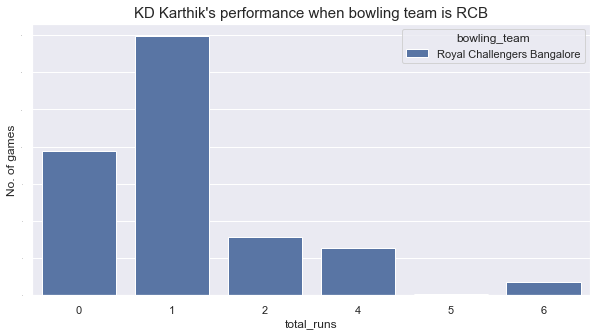

In [500]:
fig=plt.gcf()
fig.set_size_inches(10,5)
sns.countplot(x = "total_runs", hue= 'bowling_team',data = batsman_kd_)


plt.yticks(fontsize=0)
plt.title("KD Karthik's performance when bowling team is RCB" ,fontsize=15)

plt.ylabel('No. of games',fontsize=12)


plt.show()

## From above analysis it looks like Dinesh Karthik will score 0-10 runs against RCB

###############################################################################################################################

# Part 4: How many no balls will be bowled in the match?

###############################################################################################################################

## Analysis of RCB bowlers (Playing Today) according to no balls bowled in a single match

In [627]:
players_b_r = players[players.bowling_team == "Royal Challengers Bangalore"]
players_b_r.bowler.unique()

array(['TS Mills', 'A Choudhary', 'YS Chahal', 'S Aravind', 'SR Watson',
       'TM Head', 'STR Binny', 'B Stanlake', 'Iqbal Abdulla', 'P Negi',
       'S Badree', 'AF Milne', 'Avesh Khan', 'HV Patel', 'P Kumar',
       'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL White',
       'R Vinay Kumar', 'B Akhil', 'A Kumble', 'DW Steyn', 'V Kohli',
       'Abdur Razzak', 'JD Ryder', 'KP Pietersen', 'LRPL Taylor',
       'Pankaj Singh', 'KP Appanna', 'RE van der Merwe', 'D du Preez',
       'A Mithun', 'S Sriram', 'ND Doshi', 'DP Nannes', 'DL Vettori',
       'TM Dilshan', 'AUK Pathan', 'JJ van der Wath', 'R Ninan',
       'J Syed Mohammad', 'CH Gayle', 'CK Langeveldt', 'AA Kazi',
       'AB McDonald', 'M Muralitharan', 'RR Bhatkal', 'P Parameswaran',
       'JD Unadkat', 'DT Christian', 'M Kartik', 'MC Henriques',
       'RP Singh', 'R Rampaul', 'MA Starc', 'JA Morkel', 'VR Aaron',
       'AB Dinda', 'Yuvraj Singh', 'AN Ahmed', 'S Rana', 'SB Jakati',
       'SA Abbott', 'DJG Sammy', 'D 

In [628]:
# Playing today (bowlers)
bowlers_RCB = ['N Saini', 'UT Yadav', 'YS Chahal','S Dube', 'Washington Sundar', 'M Ali','CH Morris']
bowlers_RCB_ = players[players.bowler.isin(bowlers_RCB)]
bowlers_RCB_nb = bowlers_RCB_.groupby(['match_id','bowler']).apply(lambda x:np.sum(x['noball_runs'])).reset_index(name='Runs')

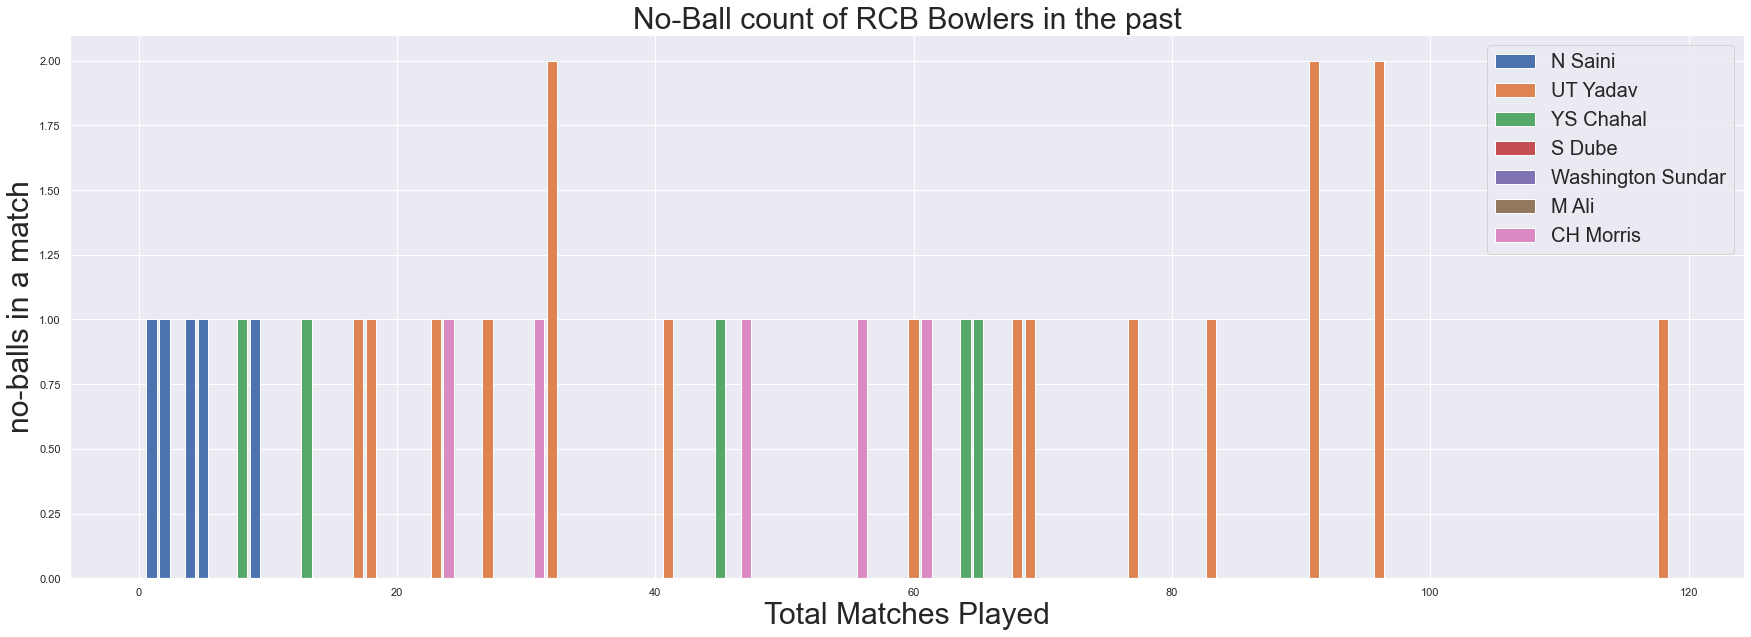

In [638]:
plt.figure(figsize=(30,10))
for name in bowlers_RCB:
    bowler_check = bowlers_RCB_nb[bowlers_RCB_nb.bowler==name]
    bowler_check.index = np.arange(1, len(bowler_check) + 1)
    x=bowler_check.index
    y=bowler_check.Runs
    plt.bar(x,y)

plt.legend(bowlers_RCB,prop={'size':20})
plt.title("No-Ball count of RCB Bowlers in the past",fontsize=30)
plt.xlabel("Total Matches Played",fontsize=30)
plt.ylabel("no-balls in a match",fontsize=30)
plt.show()

In [651]:
# No balls in a single match by RCB bowlers
d = bowlers_RCB_nb.groupby(["match_id"])


## Analysis of KKR bowlers (Playing Today) according to no balls bowled in a single match

In [632]:
players_b_k = players[players.bowling_team == "Kolkata Knight Riders"]
players_b_k.bowler.unique()

array(['TA Boult', 'PP Chawla', 'SP Narine', 'CR Woakes', 'Kuldeep Yadav',
       'YK Pathan', 'AS Rajpoot', 'UT Yadav', 'C de Grandhomme',
       'NM Coulter-Nile', 'Shakib Al Hasan', 'AB Dinda', 'I Sharma',
       'AB Agarkar', 'SC Ganguly', 'LR Shukla', 'M Kartik',
       'Mohammad Hafeez', 'DJ Hussey', 'Umar Gul', 'Shoaib Akhtar',
       'Iqbal Abdulla', 'BAW Mendis', 'CH Gayle', 'MC Henriques',
       'Anureet Singh', 'BJ Hodge', 'SS Sarkar', 'AD Mathews',
       'Mashrafe Mortaza', 'CK Langeveldt', 'RS Gavaskar', 'SE Bond',
       'MB Parmar', 'JD Unadkat', 'MK Tiwary', 'L Balaji', 'JH Kallis',
       'S Ladda', 'R Bhatia', 'RN ten Doeschate', 'B Lee', 'M de Lange',
       'PJ Sangwan', 'Mohammed Shami', 'R McLaren', 'SMSM Senanayake',
       'S Narwal', 'R Vinay Kumar', 'M Morkel', 'AD Russell', 'SA Yadav',
       'PJ Cummins', 'KC Cariappa', 'GB Hogg', 'J Botha', 'Azhar Mahmood',
       'JW Hastings', 'C Munro', 'R Sathish', 'JO Holder', 'MG Johnson',
       'N Rana', 'T Curran

In [637]:
# Playing today (bowlers)
bowlers_KKR = ['PJ Cummins', 'Kuldeep Yadav', 'AD Russell','P Krishna', 'N Rana']
bowlers_KKR_ = players[players.bowler.isin(bowlers_KKR)]
bowlers_KKR_nb = bowlers_KKR_.groupby(['match_id','bowler']).apply(lambda x:np.sum(x['noball_runs'])).reset_index(name='Runs')

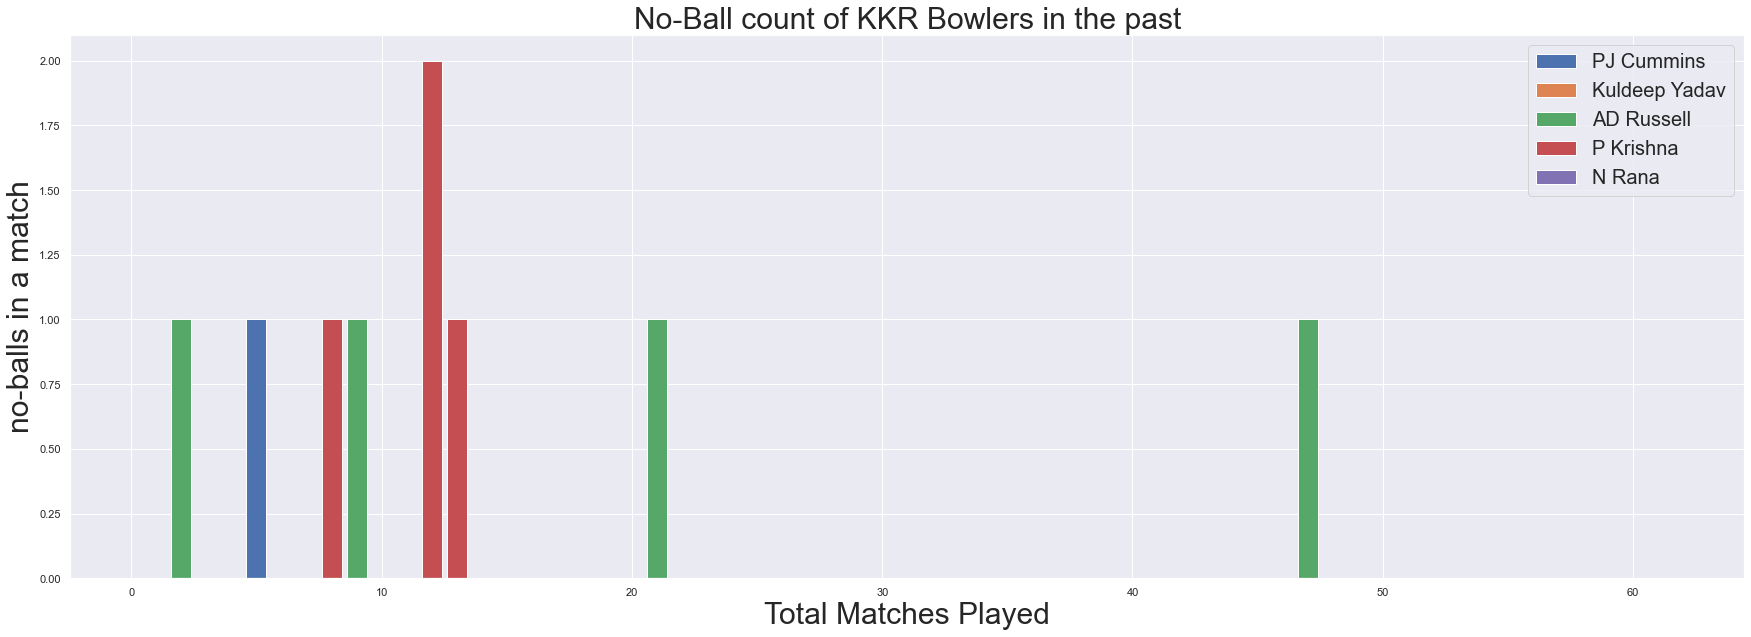

In [639]:
plt.figure(figsize=(30,10))
for name in bowlers_KKR:
    bowler_check_ = bowlers_KKR_nb[bowlers_KKR_nb.bowler==name]
    bowler_check_.index = np.arange(1, len(bowler_check_) + 1)
    x=bowler_check_.index
    y=bowler_check_.Runs
    plt.bar(x,y)

plt.legend(bowlers_KKR,prop={'size':20})
plt.title("No-Ball count of KKR Bowlers in the past",fontsize=30)
plt.xlabel("Total Matches Played",fontsize=30)
plt.ylabel("no-balls in a match",fontsize=30)
plt.show()

In [675]:
# No Balls by bothe the teams against each othe
players_nb_RK = players[((players.bowling_team == "Kolkata Knight Riders")  & (players.batting_team == "Royal Challengers Bangalore") | (players.batting_team == "Kolkata Knight Riders")  & (players.bowling_team == "Royal Challengers Bangalore"))]
players_nb_RK_ = players_nb_RK.groupby(['match_id','bowler']).apply(lambda x:np.sum(x['noball_runs'])).reset_index(name='no-balls')
players_nb_RK_g = players_nb_RK_.groupby(['match_id'])
players_nb_RK_g["no-balls"].count().mean()

11.666666666666666

In [655]:
# No balls in a single match by KKR bowlers
d_ = bowlers_KKR_nb.groupby(["match_id"])
print("no ball statistics KKR\n ",d_.count().describe())
print("\n\nno ball statistics RCB\n ",d.count().describe())

no ball statistics KKR
            bowler       Runs
count  89.000000  89.000000
mean    1.640449   1.640449
std     0.944448   0.944448
min     1.000000   1.000000
25%     1.000000   1.000000
50%     1.000000   1.000000
75%     2.000000   2.000000
max     4.000000   4.000000


no ball statistics RCB
             bowler        Runs
count  225.000000  225.000000
mean     1.382222    1.382222
std      0.848131    0.848131
min      1.000000    1.000000
25%      1.000000    1.000000
50%      1.000000    1.000000
75%      1.000000    1.000000
max      5.000000    5.000000


## Hence, from above analysis the number no balls bowled would be more than 3

##############################################################################################################################

# Part 5: How many 4's will Virat Kohli score?

###############################################################################################################################

In [502]:
players_vk = players[players.batsman == "V Kohli"]

In [507]:
players_vk_B = players_vk[(players_vk.ball == 1) & (players_vk.batsman_runs == 4)]

Text(0, 0.5, 'No. of times score is 4')

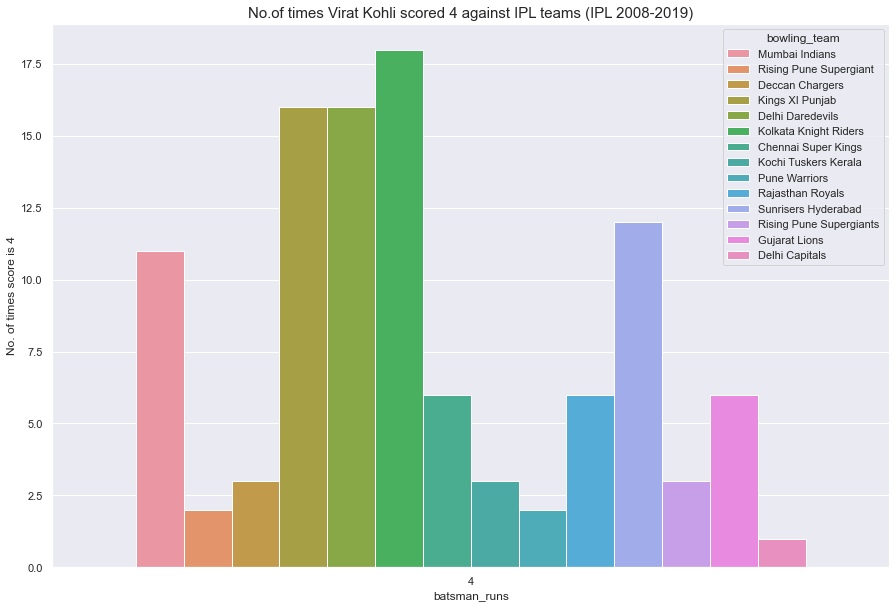

In [514]:
fig=plt.gcf()
fig.set_size_inches(15,10)
sns.countplot(x = "batsman_runs", hue = "bowling_team", data = players_vk_B)
plt.title("No.of times Virat Kohli scored 4 against IPL teams (IPL 2008-2019)" ,fontsize=15)

plt.ylabel('No. of times score is 4',fontsize=12)

## Number of 4s scored in a single match by Virat Kohli

Text(0, 0.5, 'No. of times score is 4')

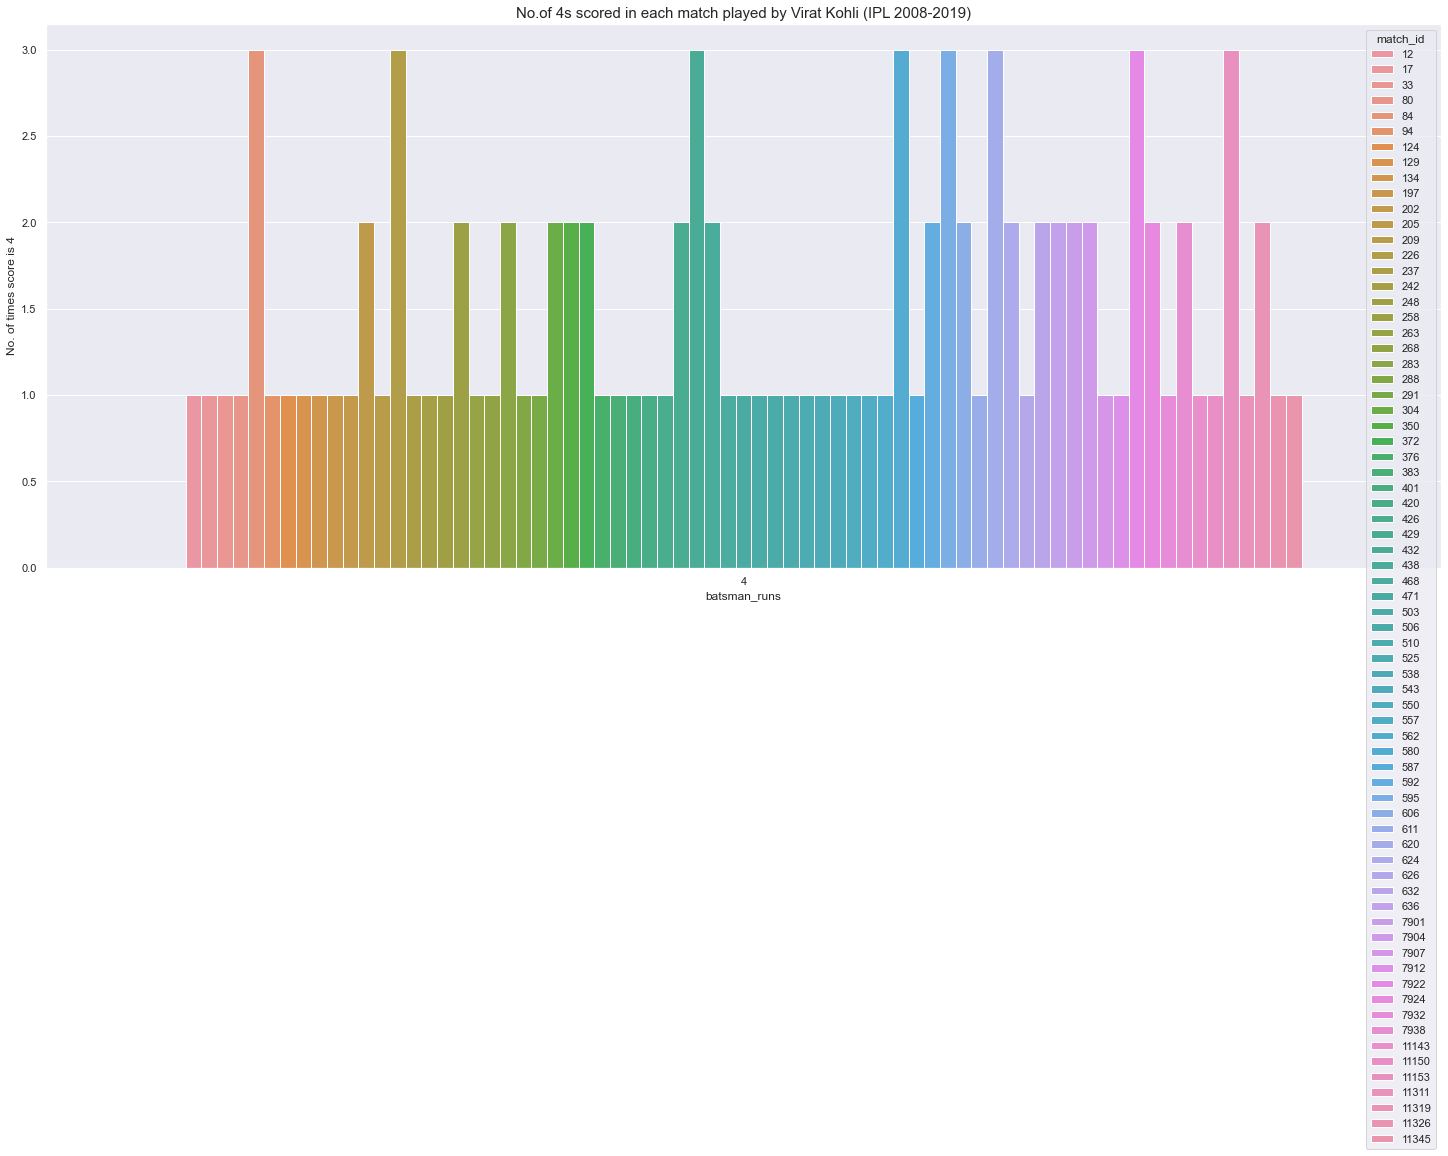

In [543]:
fig=plt.gcf()
fig.set_size_inches(25,10)
sns.countplot(x = "batsman_runs", hue = "match_id", data = players_vk_B)
plt.title("No.of 4s scored in each match played by Virat Kohli (IPL 2008-2019)" ,fontsize=15)

plt.ylabel('No. of times score is 4',fontsize=12)

## No. of 4s scored by Virat Kohli in a match against KKR 

In [545]:
players_vk_B_KKR = players_vk_B[players_vk_B.bowling_team == "Kolkata Knight Riders"]

Text(0, 0.5, 'No. of 4s')

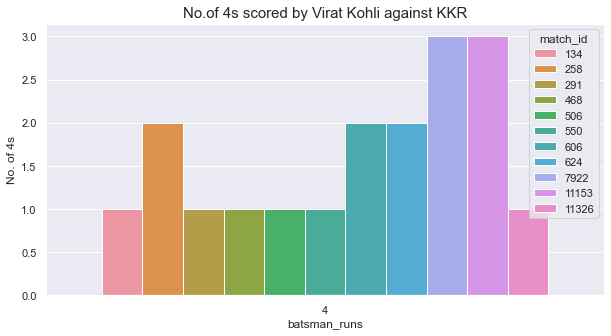

In [548]:
fig=plt.gcf()
fig.set_size_inches(10,5)
sns.countplot(x = "batsman_runs", hue = "match_id", data = players_vk_B_KKR)
plt.title("No.of 4s scored by Virat Kohli against KKR" ,fontsize=15)

plt.ylabel('No. of 4s',fontsize=12)

In [557]:
players_vk_B_KKR_ = players_vk_B_KKR.groupby(['match_id'])

##  Average Number of 4s scored by Virat Kohli against KKR in a single match

In [583]:
# Number of 4s scored by Virat Kohli against KKR in each match
players_vk_B_KKR_["batsman_runs"].mean().mean()

1.6363636363636365

### Average Number of 4s scored by Virat Kohli in each matchin IPL(2008 -2019)

In [584]:
players_vk_B_ = players_vk_B.groupby(['match_id'])
players_vk_B_["batsman_runs"].count().mean()

1.4788732394366197

## Hence,  from above data we can conclude that Virat Kohli would score  0-2 4s in a macth with KKR today

##############################################################################################################################

In [427]:
batsman_corr = players[['batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder']]